In [89]:
import sys
sys.path.insert(0, '../scripts/haplotype_imputation/')
import haplotype_imputer
import imp
haplotype_imputer = imp.reload(haplotype_imputer)

In [90]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [91]:
n = 1000
k = 10
p = 5
h1 = np.random.normal(size=(n, k))
h2 = np.random.normal(size=(n, k))
beta_f = np.random.normal(size=(k, p))
beta_m = np.random.normal(size=(k, p))
yf = np.matmul(h1[:, :5], beta_f[:5, :]) + np.random.normal(size=(n, p)) * 10
ym = np.matmul(h2[:, :5], beta_m[:5, :]) + np.random.normal(size=(n, p)) * 10
pos = np.zeros((k, p))
pos[:5, :] = 1
pos = pos == 1

np.save('h1.npy', h1)
np.save('h2.npy', h2)
np.save('yf.npy', yf)
np.save('ym.npy', ym)

In [17]:
# # load
# cmat = np.load('/Users/yanyul/Desktop/tmp/haplotype-po/cmat.npy')
# hh1 = np.load('/Users/yanyul/Desktop/tmp/haplotype-po/hh1.npy')
# hh2 = np.load('/Users/yanyul/Desktop/tmp/haplotype-po/hh2.npy')
# mmat = np.load('/Users/yanyul/Desktop/tmp/haplotype-po/mmat.npy')
# fmat = np.load('/Users/yanyul/Desktop/tmp/haplotype-po/fmat.npy')
# posmat = np.load('/Users/yanyul/Desktop/tmp/haplotype-po/posmat.npy')

In [92]:
imputer = haplotype_imputer.HaploImputer()

In [93]:
beta, beta_c, s2, prob_z, lld = imputer._em_otf_per_snp(yf, ym, h1, h2, pos)

In [96]:
prob_z

tensor([0.6964, 0.9244, 0.8256, 0.3571, 0.8874, 0.5630, 0.6579, 0.6035, 0.3607,
        0.8854, 0.7557, 0.7950, 0.5659, 0.5421, 0.4409, 0.9994, 0.6354, 0.6615,
        0.5894, 0.3313, 0.5075, 0.9761, 0.6918, 0.7059, 0.6883, 0.9494, 0.2137,
        0.6927, 0.3581, 0.8824, 0.5595, 0.7671, 0.9762, 0.9059, 0.8872, 0.7422,
        1.0000, 0.0657, 0.4791, 0.9986, 0.3950, 0.5324, 0.5630, 0.7271, 0.8936,
        0.9328, 0.5428, 0.7503, 0.6708, 0.7151, 0.7217, 0.7711, 0.1171, 0.6259,
        0.6267, 0.5988, 0.8043, 0.5390, 0.2743, 0.8398, 0.3763, 0.5230, 0.4764,
        0.3347, 0.3526, 0.5909, 0.6268, 0.7668, 0.8178, 0.9765, 0.8390, 0.7047,
        0.8763, 0.5924, 0.4696, 0.6314, 0.9239, 0.6645, 0.4997, 0.4644, 0.9881,
        0.6172, 0.9462, 0.8193, 0.5251, 0.2904, 0.5207, 0.7143, 0.8353, 0.7309,
        0.3880, 0.3952, 0.1793, 0.8130, 0.3945, 0.5577, 0.6903, 0.8177, 0.3731,
        0.6447, 0.6851, 0.5092, 0.6886, 0.4877, 0.8598, 0.5446, 0.4804, 0.4819,
        0.9714, 0.5792, 0.7087, 0.9918, 

In [94]:
lld

[tensor(-2703261.7500),
 tensor(-141182.8125),
 tensor(-141136.8906),
 tensor(-141129.5000),
 tensor(-141128.4375),
 tensor(-141128.2656),
 tensor(-141128.2344),
 tensor(-141128.2188),
 tensor(-141128.2188),
 tensor(-141128.2188),
 tensor(-141128.2188),
 tensor(-141128.2344),
 tensor(-141128.2188),
 tensor(-141128.2188),
 tensor(-141128.2188)]

In [82]:
# beta, beta_c, s2, prob_z, lld = imputer._em_otf_per_snp(fmat, mmat, hh1, hh2, posmat, covar=cmat)

KeyboardInterrupt: 

In [74]:
# self._update_beta_and_sigma2_per_snp(beta, beta_c, sigma2, h1, h2, yf, ym, gamma, pos, covar_mat, HtH, CtH, CtC, CtYf, CtYm, n)

In [83]:
beta2, s22, prob_z2, lld2 = imputer._em_otf(yf, ym, h1, h2, pos)

In [85]:
lld2

[tensor(-513208.6250),
 tensor(-27366.9570),
 tensor(-27331.6426),
 tensor(-27321.7266),
 tensor(-27319.6074),
 tensor(-27319.1836),
 tensor(-27319.0977),
 tensor(-27319.0742),
 tensor(-27319.0703),
 tensor(-27319.0664),
 tensor(-27319.0645),
 tensor(-27319.0645),
 tensor(-27319.0645),
 tensor(-27319.0664),
 tensor(-27319.0645)]

(array([  4.,  26.,  57., 101., 142., 169., 143., 154., 115.,  89.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

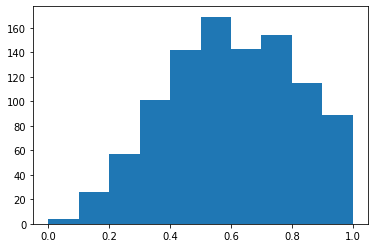

In [99]:
plt.hist(prob_z, bins=np.arange(0, 1.1, 0.1))#;plt.hist(prob_z2)

In [147]:
prob_z[:10]

tensor([0.4025, 0.6460, 0.5069, 0.5301, 0.3135, 0.4510, 0.6819, 0.5437, 0.3651,
        0.5338])

In [105]:
prob_z[:10]

tensor([0.9478, 0.1671, 0.6851, 0.9820, 0.9430, 0.9698, 0.9997, 0.9649, 0.9935,
        0.5892])

In [26]:
s2[0][:3, 1] 

tensor([1.0000, 0.1730, 0.1730])

In [100]:
np.std(yf,axis=0)**2

array([18.87695472, 19.83424696, 22.61040963, 22.42573689, 34.4996195 ])

In [85]:
beta[1][0, ]

tensor([-0.0511, -0.2751,  0.1317,  0.0059,  0.0729])

In [83]:
beta[1][1:, ]

tensor([[ 1.5734,  0.6565, -1.0499,  0.7494, -0.3730],
        [ 0.8488,  2.7596,  0.0840, -2.0849,  0.3817],
        [-2.3592, -0.4111,  0.4409, -0.3439, -0.3438],
        [-0.5890, -0.5046,  0.5690,  1.2379, -0.7125],
        [ 1.8498, -0.2226,  0.0563, -0.1733, -0.9396],
        [ 0.2906, -0.0939, -1.0328, -0.3603,  2.0336],
        [-0.8505,  0.1600,  1.8252, -0.4377,  0.3882],
        [ 0.8530,  0.1031,  0.1203,  0.8770,  0.5227],
        [ 0.1525, -1.4926, -0.3904,  0.4784, -0.3612],
        [ 0.0679,  0.8346,  0.6266, -0.3765, -0.4372]])

In [84]:
beta_m

array([[ 1.62539411,  0.74115887, -1.04523833,  0.5974547 , -0.22710973],
       [ 0.72872247,  2.90150337,  0.38132325, -1.89776903,  0.25075529],
       [-2.27146935, -0.48853157,  0.32425916, -0.38737013, -0.44650675],
       [-0.42014121, -0.40082941,  0.48190944,  1.1332377 , -1.16187146],
       [ 1.79612065, -0.24787795, -0.15765477, -0.20847491, -1.10067232],
       [ 0.21846583, -0.31218812, -1.18578395, -0.510773  ,  2.16673526],
       [-0.87576923,  0.40282281,  1.7028955 , -0.55898598,  0.36299726],
       [ 0.7498979 ,  0.21905225,  0.10318858,  0.77007957,  0.56465488],
       [-0.18159615, -1.63762798, -0.59793144,  0.45864035, -0.38369045],
       [ 0.18187011,  0.6489863 ,  0.52330609, -0.64756826, -0.56390278]])

In [90]:
print(beta[0][0, ], '\n', beta[0][1:, ], '\n', beta_f)

tensor([-0.0556,  0.2435, -0.2615,  0.1946, -0.0744]) 
 tensor([[-0.9720, -0.3224, -0.4751, -0.6717, -0.0405],
        [-0.7953,  0.3706, -0.3211,  0.2105, -2.3085],
        [ 0.1561, -0.2180,  0.8500, -1.6948,  1.5183],
        [ 0.0750,  0.6364, -0.6882, -0.3496, -1.9532],
        [ 0.5400,  0.4088,  0.7151, -0.2463, -0.1674],
        [ 0.4105, -0.0905, -0.4424, -0.1496,  0.6410],
        [ 0.1220,  0.0436,  0.2169,  0.5039, -0.3317],
        [-0.1434, -0.7615, -0.1523, -0.2404,  0.7798],
        [ 0.6071, -1.5976, -1.7286,  1.9217, -1.3230],
        [ 0.6118, -0.4791,  0.9867,  0.0941, -2.1622]]) 
 [[-1.04931527 -0.1525258  -0.69260009 -0.79646541  0.06462753]
 [-0.91284777  0.5220969  -0.23583616  0.15162415 -1.92049169]
 [ 0.12946536 -0.16038252  0.8163232  -1.65159379  1.46592198]
 [-0.16085461  0.77096508 -0.83569143 -0.36423467 -1.81669276]
 [ 0.55900223  0.3333998   0.60235426 -0.40672159 -0.27044805]
 [ 0.34872234 -0.12281894 -0.30270459 -0.25706592  0.72303256]
 [ 0.10846239